In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
%matplotlib inline
sns.set()  
df=pd.read_csv("train.csv")

df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)
df['Age'].fillna(value=df['Age'].median(), inplace=True)
df['Sex_Number'] = pd.factorize(df['Sex'], sort=True)[0]

def extract(s):
  """
  Look for a substring in my string that starts with a blank space
  then followed alpha-numeric character (case-insensitive)
  --- as many times as you can find --- until you reach a period.
  """
  pattern = r"\ \w*\."
    
  match = re.search(pattern, s)
  return match.group().strip()

df["Name_Title"] = df["Name"].apply(extract)
#Second option for Titles:
#df['Name_Title2'] = df['Name'].str.extract(r'\b(\w*\w*)\b\.')

embarked_cols = pd.get_dummies(df['Embarked'])
df_merged = pd.merge(left=df, right=embarked_cols, how='inner', on=df.index).set_index('key_0')
df_final = df_merged.drop(['Sex', 'Embarked', 'S'], axis=1)

df.head(1)
df_final.isna().sum()
df_final.head(5)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_Number,Name_Title,C,Q
key_0,,,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,Mr.,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,Mrs.,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss.,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,Mrs.,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,Mr.,0,0


In [2]:
#df[df["Name"].str.contains("Rose")]
#df[df["Name"].str.contains("DeWitt")]
#df[df["Name"].str.contains("Bukater")]
df[df["Name"].str.contains("Tobin")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number,Name_Title
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C,0,Mrs.
776,777,0,3,"Tobin, Mr. Roger",male,28.0,0,0,383121,7.7500,F38,Q,1,Mr.


In [3]:
y=df['Survived'] # we want to predict the survived column
X=df.drop('Survived',axis=1) # we dropthis column because it is the one that we want to predict

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
Xandy=X_train.copy()
Xandy['Survived']=y_train

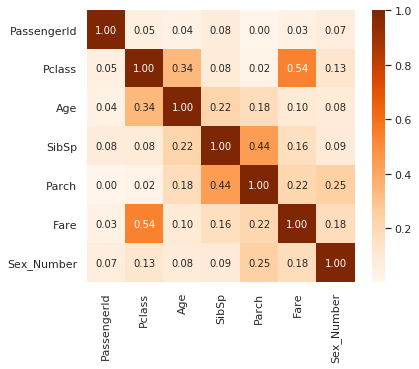

In [5]:
corr_matrix=X_train.corr()
#pd.set_option('precision',3) # it sets all the float to 3 decimals in your running pandas data's
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix.abs(), cmap='Oranges',annot=True, fmt='.2f')

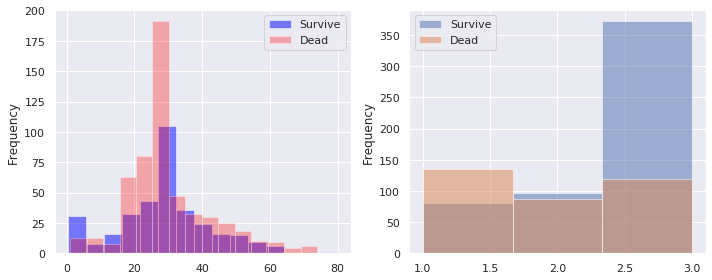

In [6]:
d_age=pd.DataFrame(df[df['Survived']==0]['Age'])
l_age=pd.DataFrame(df[df['Survived']==1]['Age'])
# first way 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
l_age.plot.hist(bins=15,color='blue',alpha=0.5,ax=ax1)
d_age.plot.hist(bins=15,color='red',alpha=0.3,ax=ax1)
ax1.legend(["Survive", "Dead"])
# second way 
df[df['Survived']==0]['Pclass'].plot.hist(bins=3,alpha=0.5,ax=ax2)
df[df['Survived']==1]['Pclass'].plot.hist(bins=3,alpha=0.5,ax=ax2)
ax2.legend(["Survive", "Dead"])
# second way for gender (stacked)
#df.groupby('Survived')['Sex'].value_counts().unstack(1).plot.bar(stacked=True,alpha=0.5,ax=ax3)
# gender unstacked
#df.groupby('Survived')['Sex'].value_counts().unstack(1).plot.bar(stacked=True,alpha=0.5,ax=ax3)
fig.tight_layout()
#sns.jointplot(x=df["Age"], y=df["Pclass"], kind='scatter')

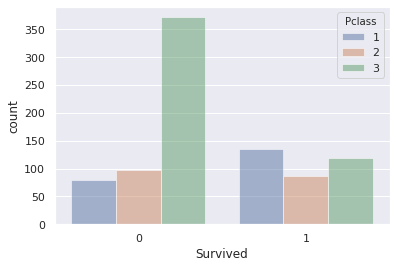

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=df, alpha=0.5)

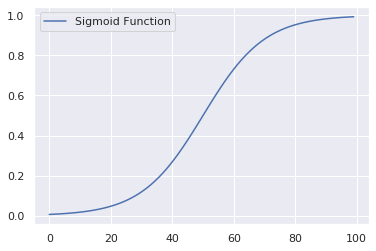

In [8]:
from math import e
import matplotlib.pyplot as plt
def sigmoid(a,b,x):
    linear=a*x+b
    sig=1/(1+e**-(linear))
    
    return sig

ages=[i for i in range(0,100,1)]
yvals=[]
for i in ages:
    y=sigmoid(0.1,-5,i) #change a and b values and see the difference
    yvals.append(y)

plt.plot(ages,yvals,label='Sigmoid Function')
plt.legend() # if you dont add this, it doesnt show the label!?!

In [9]:
df_final.info()
df_final.drop(['PassengerId', 'Name','Fare','Q','C','Name_Title','Cabin','Ticket'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Sex_Number     891 non-null int64
Name_Title     891 non-null object
C              891 non-null uint8
Q              891 non-null uint8
dtypes: float64(2), int64(6), object(4), uint8(2)
memory usage: 92.2+ KB


In [10]:
X = df_final.drop("Survived",axis=1)
y = df_final["Survived"]
X.shape, y.shape, df_final.isna().sum(), X.isna().sum()

((891, 5), (891,), Survived      0
 Pclass        0
 Age           0
 SibSp         0
 Parch         0
 Sex_Number    0
 dtype: int64, Pclass        0
 Age           0
 SibSp         0
 Parch         0
 Sex_Number    0
 dtype: int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#m = LogisticRegression()
m = RandomForestClassifier()
m.fit(X_train, y_train)
m.score(X_train, y_train)

/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9131736526946108

In [12]:
X=df_final[['Pclass','Age','SibSp','Parch','Sex_Number']]
y=df_final['Survived']
m.fit(X_train,y_train)
m.score(X_train,y_train)
m.coef_, m.intercept_
from sklearn.model_selection import cross_val_score
# 1. model (i.e. estimator)
# 2. X_train
# 3. y_train
# 4. number of the folds (10-fold preffered, but it definitely depends on the dataset)
acc=cross_val_score(m, X_train, y_train, cv=5, scoring='accuracy')
acc, acc.mean()

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

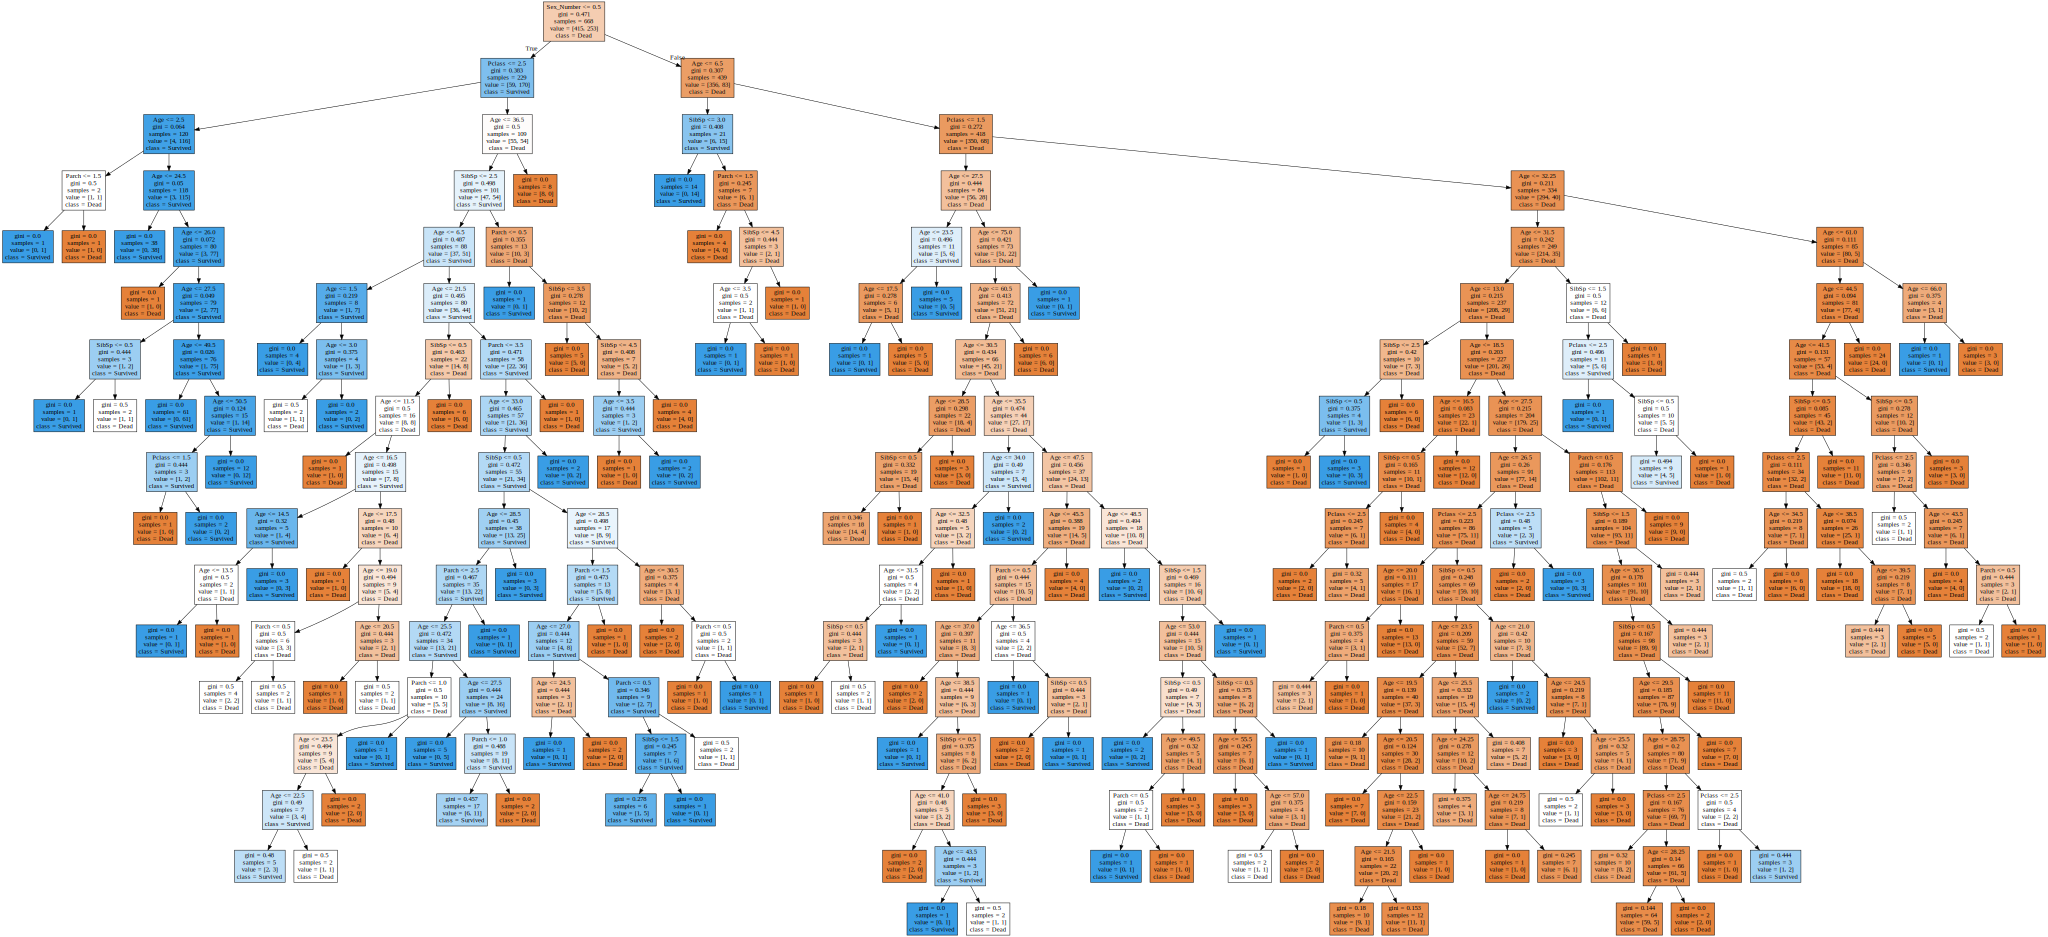

In [13]:
from sklearn.tree import DecisionTreeClassifier
m_des=DecisionTreeClassifier()
X=df_final[['Pclass','Age','SibSp','Parch','Sex_Number']]
y=df_final['Survived']
m_des.fit(X_train,y_train)
m_des.score(X_train,y_train)
from sklearn.tree import export_graphviz
import graphviz
import os

tree = export_graphviz(m_des, out_file=None,
                class_names=["Dead", "Survived"],
                feature_names=['Pclass','Age','SibSp','Parch','Sex_Number'],
                impurity=True,
                filled=True)
open('titanic.dot', 'w').write(tree)

graph = graphviz.Source(tree)
graph.render('titanic')  # creates PDF
graph  # in Jupyter


In [14]:
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
def feature_engineer(df_test):
    df_test['Embarked'].fillna(df_test['Embarked'].mode(), inplace=True)
    df_test['Age'].fillna(value=df_test['Age'].median(), inplace=True)
    df_test['Sex_Number'] = pd.factorize(df_test['Sex'], sort=True)[0]
    df_test['Name_Title'] = df_test['Name'].str.extract(r'\b(\w*\w*)\b\.')
    embarked_cols = pd.get_dummies(df_test['Embarked'])
    df_merged2 = pd.merge(left=df_test, right=embarked_cols, how='inner', on=df_test.index).set_index('key_0')
    df_test = df_merged2.drop(['Sex', 'Embarked', 'S'], axis=1)
    return df_test


In [24]:
# this cell is only for Logical Regression part
#X = df_test
#y = df_
#ypred=m.predict(X_test)
#X_test.shape, y_test.shape, df_test.isna().sum(), X.isna().sum()

In [25]:
df_test=pd.read_csv("test.csv")

#set ids as PassengerId and predict survival
ids = df_test['PassengerId']
df_test = feature_engineer(df_test)
df_test=df_test[['Pclass','Age','SibSp','Parch','Sex_Number']]
df_test.head(2)

,Pclass,Age,SibSp,Parch,Sex_Number
key_0,,,,,
0,3,34.5,0,0,1
1,3,47.0,1,0,0


In [27]:
df_predictions = m.predict(df_test)
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': df_predictions })
output.to_csv('submission.csv', index=False)